In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
import nltk
from sklearn.base import BaseEstimator, TransformerMixin
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import re

In [3]:
train = pd.read_csv(r"/kaggle/input/nlp-getting-started/train.csv")
test = pd.read_csv(r"/kaggle/input/nlp-getting-started/test.csv")

In [4]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


<Axes: >

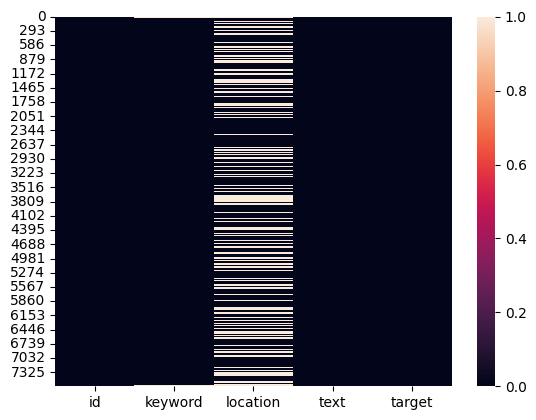

In [5]:
sns.heatmap(train.isnull())

In [6]:
train.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

<Axes: xlabel='target', ylabel='count'>

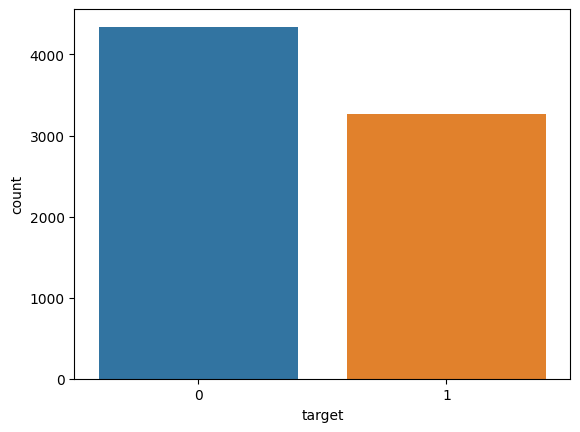

In [7]:
sns.countplot(data=train,x='target')

In [8]:
# def remove_non_alphabetic(text):
#     return re.sub('[^a-zA-Z]', '', text)
# class RemoveNonAlphabet(BaseEstimator, TransformerMixin):
#     def fit(self,X):
#         return self
#     def transform(self,X):
#         return [''.join(re.sub('[^a-zA-Z]', '', text)) for text in X]

In [9]:
# def stopwords(string):
#     text = string.split()
#     return ''.join([i for i in text if i not in nltk.corpus.stopwords.words('english')])
# class StopWords(BaseEstimator, TransformerMixin):
#     def fit(self,X):
#         return self
#     def transform(self,X):
#         return [''.join([i for i in text.split() if i not in nltk.corpus.stopwords.words('english')]) for text in X]
    
    

In [10]:
# class Lemmatizer( BaseEstimator, TransformerMixin):
    
#     def fit(self,X):
#         return self
#     def transform(self,X):
#         lemmatize = WordNetLemmatizer()
#         return [''.join([lemmatize.lemmatize(i) for i in text]) for text in X]

In [11]:
# !unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

In [12]:
tfidf = TfidfVectorizer(max_features=5000,stop_words='english')

In [13]:
X = train['text']
y = train['target']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
X_train = tfidf.fit_transform(X_train)

In [16]:
X_test = tfidf.transform(X_test)

**Multinomial Naive-bayes
**

In [17]:
mnb = MultinomialNB()

In [18]:
mnb.fit(X_train,y_train)

MultinomialNB()

In [19]:
y_pred_mnb = mnb.predict(X_test)

In [20]:
y_pred_mnb

array([0, 0, 0, ..., 1, 1, 0])

In [21]:
accuracy_score(y_test,y_pred_mnb)

0.7984241628365069

**Bernoulli Naive-Bayes**

In [22]:
bnb = BernoulliNB(alpha = 0.65)
bnb.fit(X_train,y_train)

BernoulliNB(alpha=0.65)

In [23]:
y_pred_bnb = bnb.predict(X_test)

In [24]:
accuracy_score(y_test,y_pred_bnb)

0.7951411687458962

**RandomForestClassifier**

In [25]:
rf = RandomForestClassifier(n_estimators=71)

In [26]:
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=71)

In [27]:
y_pred_rf = rf.predict(X_test)

In [28]:
accuracy_score(y_test,y_pred_rf)

0.788575180564675

> ****Logistic Regression****

In [29]:
lr = LogisticRegression(max_iter=1000)

In [30]:
lr.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [31]:
pred_y_lr = lr.predict(X_test)

In [32]:
accuracy_score(y_test,pred_y_lr)

0.7997373604727511

**Best Model is-> Bernoulli Naive-Bayes**
> *Accuracy = 0.7964543663821405*